# Telecom Churn Prediction Project

## 1. Business Understanding

Customer churn is the term used to describe when customers end their relationship or discontinue doing business with a company. In the case of a telecommunications company like SyriaTel, customer churn refers to when subscribers terminate their services, such as canceling their phone line or switching to a different service provider. Churn is a crucial metric for telecom businesses as it signifies the loss of potential revenue and underscores the importance of implementing customer retention strategies. By gaining insights into the factors that contribute to customer churn and being able to predict it in advance, businesses can take proactive measures to minimize churn, enhance customer loyalty, and maintain a stable and profitable customer base.

#### 1.1 Objectives:

1. To develop an accurate and reliable customer churn prediction model

2. To identify key factors contributing to customer churn

3. To formulate targeted customer retention strategies

## 2. Data  Understanding




The dataset provided for the SyriaTel customer churn analysis contains comprehensive information about customers' telecommunications usage and account details. It includes columns such as 'state' (customer's state of residence), 'account length' (duration of customer's association with the company), 'area code' (telephone area code), 'phone number', 'international plan' (presence of an international plan), 'voice mail plan' (availability of voicemail service), and various columns related to call duration, charges, and customer service calls.

This dataset offers an opportunity to explore the relationship between these variables and the target variable, 'churn', which indicates whether a customer has churned or not. By examining this data, we can gain insights into the patterns and factors that potentially contribute to customer churn in the telecom industry.

In order to begin working with our data, we need to import the necessary libraries for the various data manipulation, analysis and modelling tasks.

>> The steps included in this phase include:

* Loading the dataset into a pandas dataframe
  
* Printing the columns, shape, information, descriptive statistics and the first few rows

* Checking for missing values

* Exploring unique values in the categorical columns

* Exploring the target variable, churn


In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for building models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Libraries for Preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Libraries for Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


from my_functions import evaluate_model, perform_cross_validation, plot_model_performance, plot_recall_scores



In [2]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('Data/telecom_churn.csv')

In [3]:
# Printing the columns in the dataset
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
# Print the first five rows of the dataframe
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# Print information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# Print the shape of the dataframe
print("Shape:", df.shape)

Shape: (3333, 21)


In [7]:
# Get the summary statistics for dataframe
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [9]:
# Show unique values in our target column ('churn')
print("Unique Churn Values:")
print(df['churn'].unique())

Unique Churn Values:
[False  True]


In [10]:
# Display the count of each class in the 'churn' column
print("Churn Class Distribution:")
print(df['churn'].value_counts())


Churn Class Distribution:
False    2850
True      483
Name: churn, dtype: int64


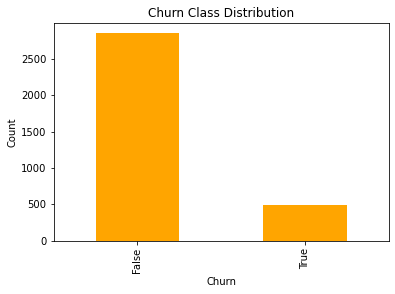

In [11]:
# Visualize the class distribution in the 'churn' column
plt.figure(figsize=(6, 4))
df['churn'].value_counts().plot(kind='bar', color='orange')
plt.title("Churn Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [12]:
# Check the unique values in categorical columns
print("Unique values in categorical columns:")
categorical_cols = ['state', 'international plan', 'voice mail plan']
for col in categorical_cols:
    print(col, ":", df[col].unique())

Unique values in categorical columns:
state : ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
international plan : ['no' 'yes']
voice mail plan : ['yes' 'no']


>> **Summary**

**The dataset contains 3333 rows and 21 columns.**

**The columns represent various features such as state, account length, area code, phone number, international plan, voice mail plan, and numerical variables related to call durations, charges, and customer service calls.**

**The data types of the columns include bool, int64, float64, and object.**

**There are no missing values in any of the columns, as indicated by the count of missing values being 0 for each column.**

**The 'state' column has unique values representing different states.
The 'international plan' and 'voice mail plan' columns have unique values of 'yes' and 'no' indicating the presence or absence of the respective plans.**

**The churn class distribution shows that the dataset has a class imbalance, with a higher number of customers not churning compared to those who churned.**

## 3. Data Preparation

>> In this phase, we are preparing the data for data analysis.
The following tasks are performed to ensure the data is ready for analysis:

* Dropping Unnecessary Columns

* Encoding Categorical Variables



   

In [13]:
# Drop 'phone number' column as it is not relevant to our analysis and modelling
df = df.drop(columns=["phone number"], axis=1)

# Encode binary categorical variables
df["international plan"] = df["international plan"].map({"yes": 1, "no": 0})
df["voice mail plan"] = df["voice mail plan"].map({"yes": 1, "no": 0})

# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encoding the "churn" column
df['churn'] = label_encoder.fit_transform(df['churn'])

# Replace spaces with underscores in column names
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)


## 4. Exploratory Data Analysis


In this phase, we visualized some columns to identify relationships between variables, patterns and outliers.


>> ##### Univariate analysis
* Numerical Variables

* Categorical Variables

In [14]:
# Create a dataframe with only the numeric columns
numeric_cols = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
                'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
                'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
                'customer_service_calls']
numeric_df = df[numeric_cols]


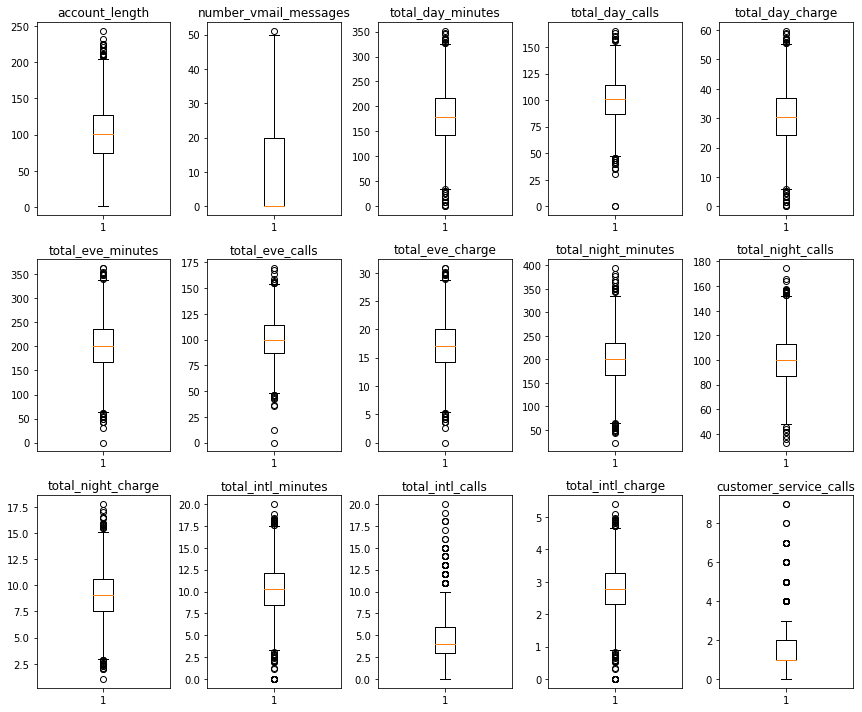

In [15]:
# Create boxplots to check for outliers
plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 5, i+1)
    plt.boxplot(data=numeric_df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()


>> **Findings:**

* From the boxplots, all numerical features have outliers, some very significant like in the 'total_int_calls' column and some not very significant like 'total_night' column. 

* The presence of outliers in this dataset may have been attributed to extreme customer behavior. 


Now let's explore the distribution of the numeric features.

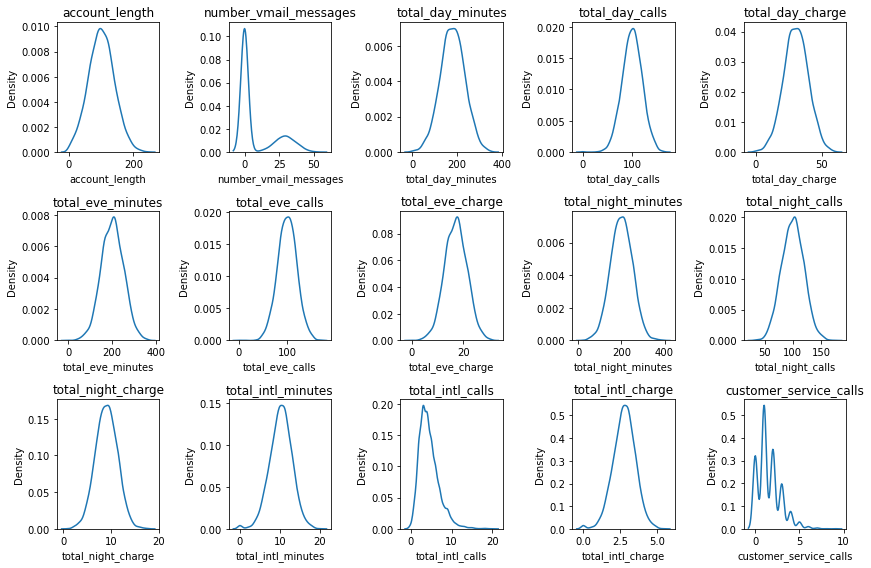

In [16]:
# Create KDE plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(data=numeric_df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

>> ### **Findings**: 

* Account Length: The distribution is relatively uniform.

* Number of Voicemail Messages: Skewed right, with a peak at zero.

* Total Day Minutes: Approximately normal distribution with a slight right skew. Peak around 200 minutes.

* Total Day Calls: Roughly symmetric, with a peak around 100 calls.

* Total Day Charge: Distribution follows the shape of Total Day Minutes. Approximately normal with a slight right skew.

* Total Eve Minutes: Similar distribution to Total Day Minutes. Slightly skewed right, peak around 200 minutes.

* Total Eve Calls: Approximately symmetric distribution. Peak around 100 calls, even spread of values.

* Total Eve Charge: Distribution follows Total Eve Minutes, approximately normal with a slight right skew.

* Total Night Minutes: Approximately normal distribution, slightly skewed right, peak around 200 minutes.

* Total Night Calls: Approximately symmetric distribution, Peak around 100 calls, even spread of values.

* Total Night Charge: Distribution follows Total Night Minutes, Approximately normal with a slight right skew.

* Total Intl Minutes: Right-skewed distribution. Majority of customers have lower number of international minutes. Peak around 10 minutes for shorter international calls.

* Total Intl Calls: Approximately symmetric distribution with a peak around 3-4 calls, even spread of values.

* Total Intl Charge: Distribution follows Total Intl Minutes.

* Customer Service Calls: Right-skewed distribution, with a peak at zero indicating a significant portion of customers don't make any service calls.

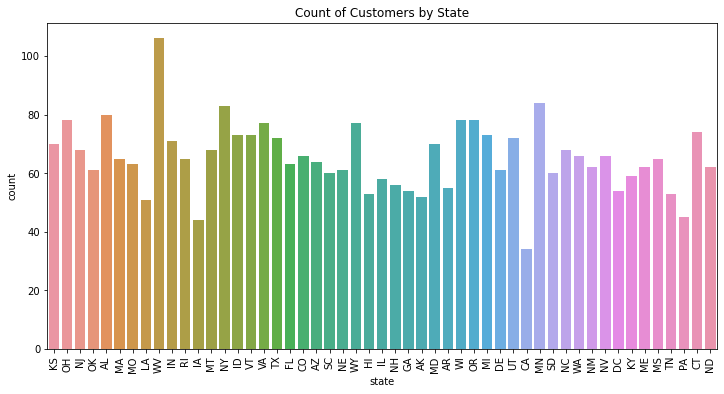

In [17]:
# Count plot of states
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state')
plt.title('Count of Customers by State')
plt.xticks(rotation=90)
plt.show()


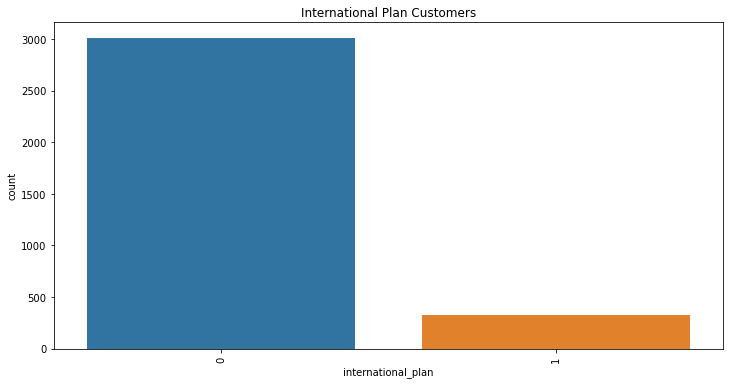

In [23]:
# Count plot of customers with international plan
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='international_plan')
plt.title('International Plan Customers')
plt.xticks(rotation=90)

plt.show()

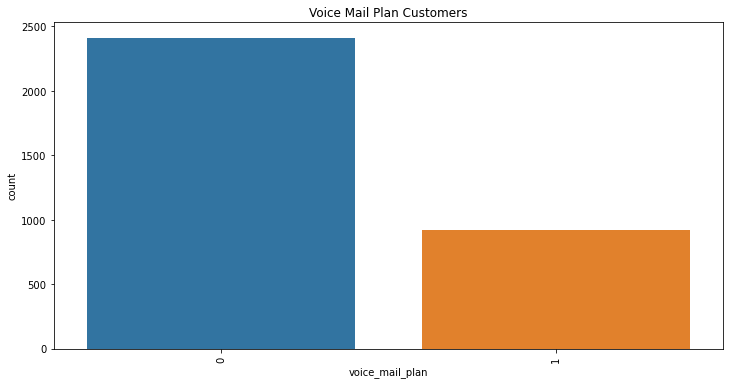

In [25]:
# Count plot of voice mail
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='voice_mail_plan')
plt.title('Voice Mail Plan Customers')
plt.xticks(rotation=90)

plt.show()

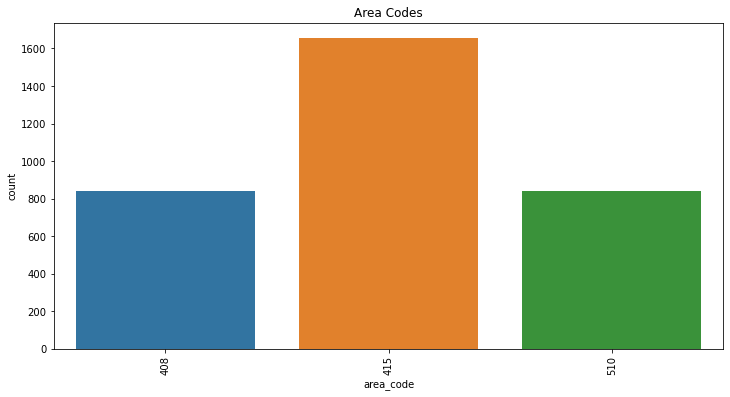

In [27]:
# Count plot of area_code
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='area_code')
plt.title('Area Codes')
plt.xticks(rotation=90)

plt.show()

Bivariate Analysis

1. Voice mail Plan

In [ ]:
from my_functions import plot_categorical_churn

In [ ]:
plot_categorical_churn('voice mail plan')

2. International Plan

In [ ]:
plot_categorical_churn('international plan')

State

In [ ]:
# Calculate churn percentage by state
state_churn_percentage = df.groupby('state')['churn'].mean() * 100

# Sort the states by churn percentage in descending order and select the top 5 states
top_states = state_churn_percentage.sort_values(ascending=False).head(5)
top_states

>> The five states likely to churn are:

* California (CA) with a churn rate of 26.47%

* New Jersey (NJ) with a churn rate of 26.47%

* Texas (TX) with a churn rate of 25.00%

* Maryland (MD) with a churn rate of 24.29%

* South Carolina (SC) with a churn rate of 23.33%

In [ ]:
correlation_matrix = numeric_df.corr()

# Create a fig size
plt.figure(figsize=(16, 16))

# Create a mask to show only the lower triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)

mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with the lower triangle mask applied
sns.heatmap(correlation_matrix, mask=mask, cmap='magma', center=0, annot=True)

# Show the plot
plt.show();

In [ ]:
df['day minutes service calls interaction'] = df['total day minutes'] * df['customer service calls']
df['eve night minutes interaction'] = df['total eve minutes'] * df['total night minutes']

df.head()

In [ ]:
df.columns

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['churn', 'state'], axis=1)
y = df['churn']

In the modeling phase, the following steps are involved:

1. Selecting Modeling Techniques:

2. Generate Test Design

3. Build Model

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Apply SMOTE to handle class imbalance on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply StandardScaler for feature scaling on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Apply feature scaling and constant term to the test set
X_test_scaled = scaler.transform(X_test)

##### Baseline Model

1. Logistic Regression Model

In [ ]:
# Create a logistic regression model
baseline_model = LogisticRegression(solver='liblinear',random_state=42)
# Train the model
baseline_model.fit(X_train_scaled, y_train_resampled)


In [ ]:
# Make predictions on the test set for the Logistic Regression baseline model
y_pred_1 = baseline_model.predict(X_test_scaled)

baseline_cv = perform_cross_validation(X_train_scaled, y_train_resampled, model_type='logistic_regression')
print("Baseline Cross Validation Score", baseline_cv)

evaluate_model(y_test, y_pred_1)

Feature Selection

In [ ]:
from sklearn.feature_selection import RFE


# Create an instance of the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Create an instance of the RFE selector
rfe = RFE(estimator=logreg, n_features_to_select=10)  # Select the desired number of features

# Fit the RFE selector on your training data
rfe.fit(X_train_scaled, y_train_resampled)

# Get the selected feature indices
selected_indices = rfe.get_support(indices=True)

# Subset your training and test data based on the selected features
X_train_selected = X_train.iloc[:, selected_indices]
X_test_selected = X_test.iloc[:, selected_indices]

# Train your model using the selected features
logreg.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_selected)

# Evaluate the performance of your model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Selected Features: {X_train_selected.columns.tolist()}")
print(f"Accuracy: {accuracy}")



Recursive Feature Elimination (RFE) process selected the following features: 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day charge', 'total night charge', 'total intl calls', 'total intl charge', 'customer service calls', and 'eve night minutes interaction'

The logistic regression model trained on these selected features achieved an accuracy of approximately 84.86% on the test data.

2. Decision Tree Classifier

In [ ]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42) 
tree_clf.fit(X_train_selected, y_train)


3. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_selected, y_train)

4. Gradient Boosting Classifier

In [ ]:
# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_model.fit(X_train_selected, y_train)

#### Predictions 

In [ ]:

# Make predictions on the test data for the Decision Tree model
y_pred_2 = tree_clf.predict(X_test_selected)

# Make predictions on the test data for the Random Forest model
y_pred_3 = rf_model.predict(X_test_selected)

# Make predictions on the test data for the Gradient Boosting Classifier 
y_pred_4 = gb_model.predict(X_test_selected)


### Evaluation metrics

The evaluation metrics used to assess the models include:

- Accuracy
- Precision
- Recall
- F1-score
- Cross Validation Score



2. Decision Tree

In [ ]:
cv_dt = perform_cross_validation(X_train_selected, y_train, model_type='decision_tree')
print("Decision Tree Model Cross Validation Score:", cv_dt)

evaluate_model(y_test, y_pred_2)

3. Random Forest

In [ ]:
cv_rf = perform_cross_validation(X_train_selected, y_train, model_type='random_forest')
print("Random Forest Cross Validation Score:", cv_rf)

evaluate_model(y_test, y_pred_3)

4. Gradient Boosting Classifier

In [ ]:
cv_gc = perform_cross_validation(X_train_selected, y_train, model_type='gradient_boosting')
print("Gradient Boosting Classifier Cross Validation Score", cv_gc)

evaluate_model(y_test, y_pred_4)

| Model                             | Cross Validation Score | Accuracy | Precision | Recall  | F1-score |
|-----------------------------------|-----------------------|----------|-----------|---------|----------|
| Baseline                          | 0.7583                | 0.7631   | 0.3610    | 0.7327  | 0.4837   |
| Decision Tree                     | 0.9171                | 0.9370   | 0.8105    | 0.7624  | 0.7857   |
| Random Forest                     | 0.9550                | 0.9505   | 0.9250    | 0.7327  | 0.8177   |
| Gradient Boosting Classifier      | 0.9179                | 0.9505   | 0.8953    | 0.7624  | 0.8235   |


Based on these metrics, the Gradient Boosting Classifier outperforms the other models, showing the highest scores for cross-validation, accuracy, precision, recall, and F1-score.

In [ ]:
models = ['Baseline', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
cross_validation_scores = [0.7583, 0.9171, 0.9550, 0.9171]
accuracy_scores = [0.7631, 0.9370, 0.9505, 0.9505]
precision_scores = [0.3610, 0.8105, 0.9250, 0.8953]
recall_scores = [0.7327, 0.7624, 0.7327, 0.7624]
f1_scores = [0.4837, 0.7857, 0.8177, 0.8235]

plot_model_performance(models, cross_validation_scores, accuracy_scores, precision_scores, recall_scores, f1_scores)


In [ ]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Plot the cross-validation scores
plt.bar(models, recall_scores, color='#D35400')

# Set the title and labels
plt.title('Cross-Validation Scores for Each Model', fontweight='bold', fontsize=20)
plt.xlabel('Model', fontsize=18, fontweight='bold')
plt.ylabel('Cross-Validation Score', fontsize=18, fontweight='bold')

# Adjust the y-axis limits
plt.ylim(0, 1)

# Set the xticks and yticks
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Adjust the x-axis limits
plt.xlim(-0.5, len(models) - 0.5)
# Display the plot
plt.show()


# Hyperparameter tuning

>> Here's an outline of the hyperparameter tuning process for the Gradient Boosting Classifier using GridSearchCV:

> Import the necessary libraries

> Define the parameter grid

> Instantiate the GradientBoostingClassifier object

> Create a GridSearchCV object, passing the Gradient Boosting Classifier, the parameter grid, the number of cross-validation folds (cv), and the scoring metric (e.g., 'accuracy').

> Fit the grid search to the training data

> Get the best parameters and best score

> Create an instance of the Gradient Boosting Classifier with the best parameters

> Train the classifier on the entire training dataset

> Make predictions on the test data

> Perform cross-validation on the tuned model

> Evaluate the tuned model using evaluating metrics


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Create an instance of the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


In [ ]:

# Create an instance of the Gradient Boosting Classifier with the best parameters
gb_classifier_1 = GradientBoostingClassifier(max_depth=5, n_estimators=300)

# Train the classifier on the entire training dataset
gb_classifier_1.fit(X_train_selected, y_train)



In [ ]:
y_pred_5 = gb_classifier_1.predict(X_test_selected)

cv_gc_1 = perform_cross_validation(X_train_selected, y_train, model_type='gradient_boosting', max_depth=5, n_estimators=300)
print("Gradient Boosting Classifier Tuned model Cross Validation Score", cv_gc_1)

# Evaluate tuned model
evaluate_model(y_test, y_pred_5)
